In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

In [2]:
df_country = pd.read_csv('data/countrydyadicvars.csv')
df_country.head()

,cowc_source,cowc_dest,year,cowc_source_yr,cowc_dest_yr,nwg_ec_source,nwg_ec_source_avg,nwg_ec_dest,nwg_ec_dest_avg,btoa,...,TIV_atob_10,IdealPointDistance,colonized,BIT,conflicts_n,migration_stock,rta,sanctionsinplace,CulturalDist_KogutSingh_4,CulturalDist_KogutSingh_6
0,AD,AE,2000,AD_2000,AE_2000,0.292352,0.0,0.762256,0.0,215.0,...,0.0,1.685514,0,0,0,0.0,0,0,NaN,NaN
1,AD,AE,2001,AD_2001,AE_2001,0.313828,0.0,0.747205,0.0,22107.0,...,0.0,1.802059,0,0,0,0.0,0,0,NaN,NaN
2,AD,AE,2002,AD_2002,AE_2002,0.323126,0.0,0.731824,0.0,36238.0,...,0.0,2.016481,0,0,0,0.0,0,0,NaN,NaN
3,AD,AE,2003,AD_2003,AE_2003,0.338390,0.0,0.740421,0.0,562357.0,...,0.0,2.062506,0,0,0,0.0,0,0,NaN,NaN
4,AD,AE,2004,AD_2004,AE_2004,0.349449,0.0,0.766408,0.0,2712.0,...,0.0,1.994187,0,0,0,0.0,0,0,NaN,NaN


In [3]:
# What country appeared the most in the data
top_source_country = df_country['cowc_source'].value_counts().idxmax()

# What country received the most investments based on appearance
top_dest_country = df_country['cowc_dest'].value_counts().idxmax()

# Print results
print(f'The country that appeared the most in the data: {top_source_country}')
print(f'The country that received the most investments based on appearance: {top_dest_country}')

The country that appeared the most in the data: AD
The country that received the most investments based on appearance: AE


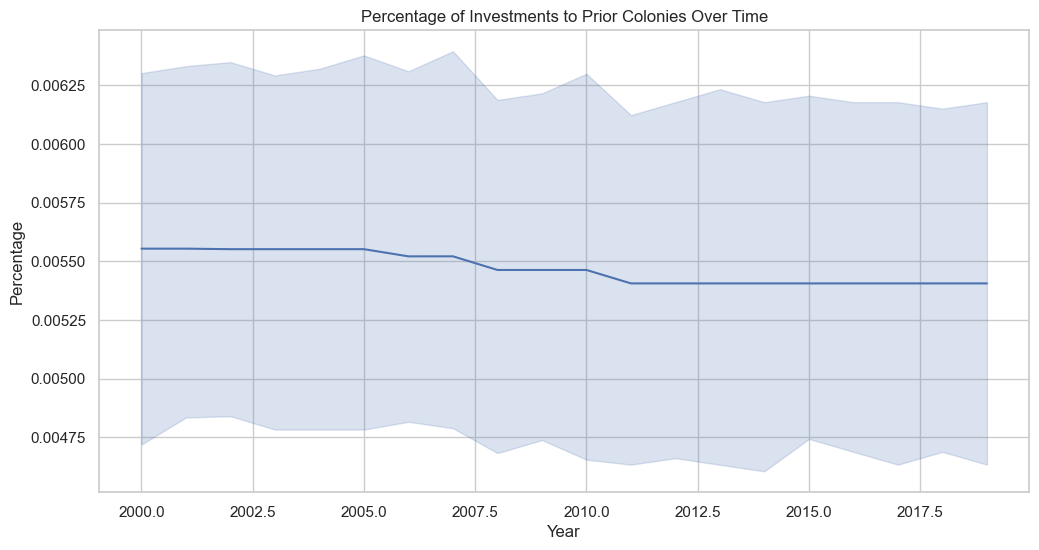

<Figure size 640x480 with 0 Axes>

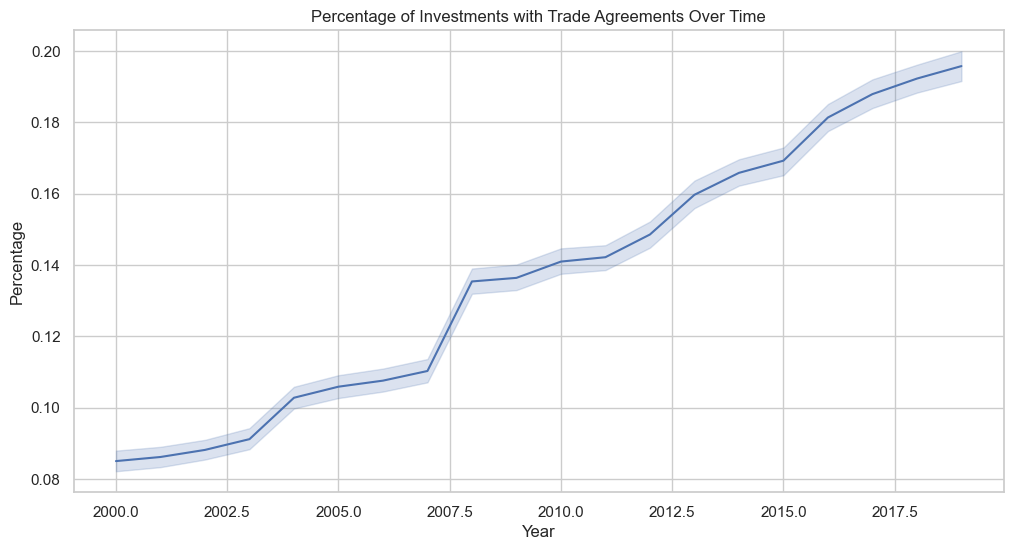

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot the trend for 'is_colony' for each year
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='colonized', data=df_country)
plt.title('Percentage of Investments to Prior Colonies Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

plt.savefig('plots/colonies_plot.png',dpi=300)

# Plot the trend for 'has_trade_agreement' for each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='rta', data=df_country)
plt.title('Percentage of Investments with Trade Agreements Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

plt.savefig('plots/trade_agreement_plot.png',dpi=300)

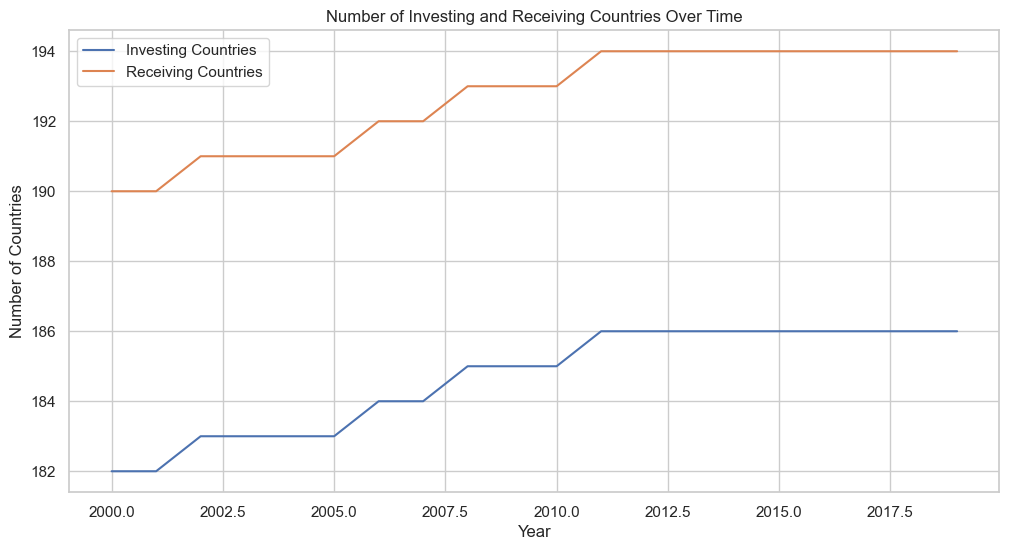

<Figure size 640x480 with 0 Axes>

In [5]:
# Number of investing countries (crowc_source) and receiver countries (crowc_dest) for each year
investing_countries_per_year = df_country.groupby('year')['cowc_source'].nunique()
receiving_countries_per_year = df_country.groupby('year')['cowc_dest'].nunique()

# Plot the trend for the number of investing and receiving countries
plt.figure(figsize=(12, 6))
sns.lineplot(x=investing_countries_per_year.index, y=investing_countries_per_year.values, label='Investing Countries')
sns.lineplot(x=receiving_countries_per_year.index, y=receiving_countries_per_year.values, label='Receiving Countries')
plt.title('Number of Investing and Receiving Countries Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend()
plt.show()

plt.savefig('plots/flow_plot.png',dpi=300)

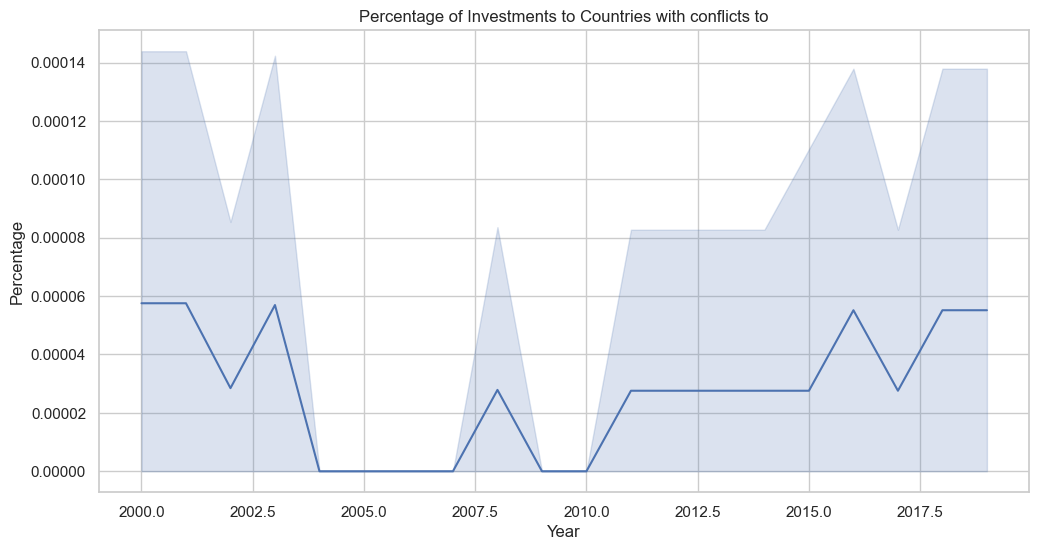

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the trend for 'has_trade_agreement' for each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='conflicts_n', data=df_country)
plt.title('Percentage of Investments to Countries with conflicts to')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

plt.savefig('plots/conflicts_plot.png',dpi=300)

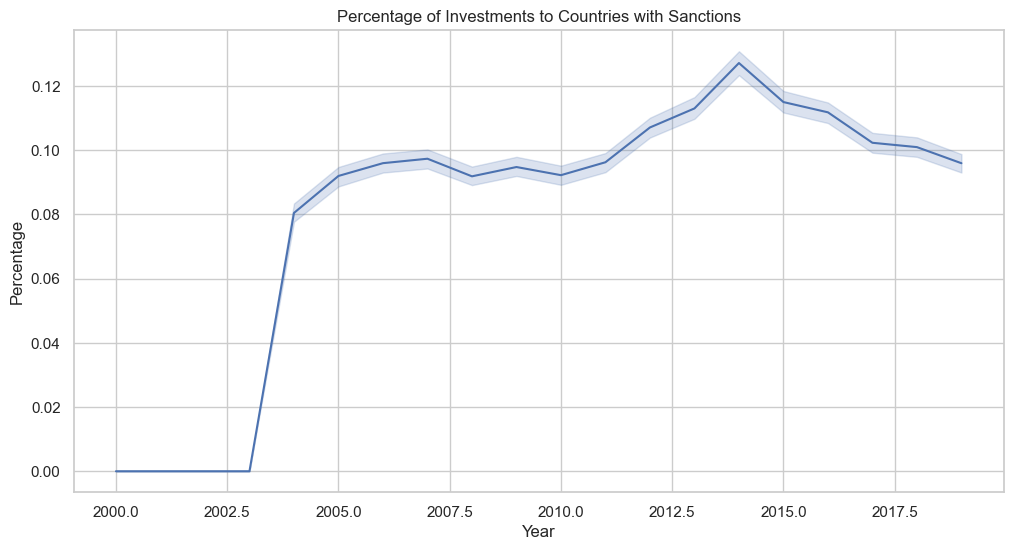

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sanctionsinplace', data=df_country)
plt.title('Percentage of Investments to Countries with Sanctions')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show()

plt.savefig('plots/sanctions_plot.png',dpi=300)

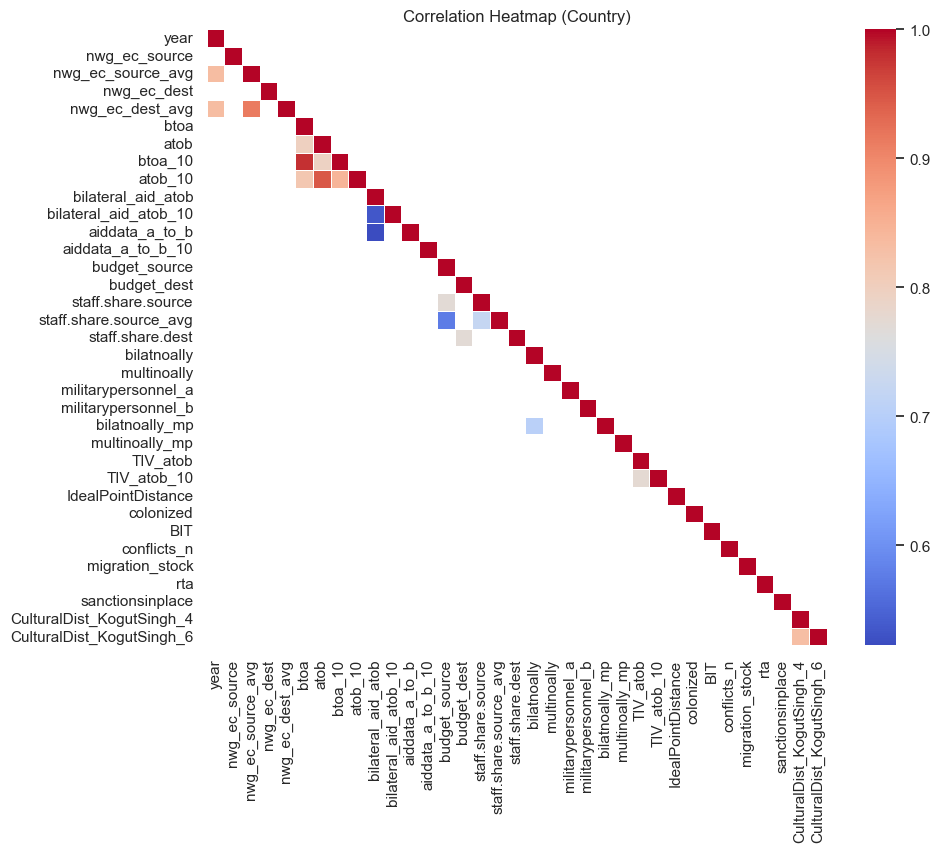

In [8]:
corr_matrix = df_country.corr(numeric_only=True)
threshold = 0.5

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones(corr_matrix.shape), k=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)], 
            annot=False, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap (Country)')
plt.show()

In [9]:
df_fdi = pd.read_csv('data/fdi.csv')

df_fdi_invest = df_fdi[df_fdi['invest_actual']==1]
print(df_fdi_invest.shape)
df_fdi_invest.head()

(1835, 46)


,invest_actual,year,sic,bvdid,cowc3_dest,cowc3_source,foundingyear,isin,ticker,oprevenue,...,gdp.percapita,gdp.annualgrowth,population,fdi.netinflows,natural.resource.rents,patents,polcon3_val,polcon5_val,icrg,polity2
18,1.0,2010,3648,AT9010000310,CHN,AUT,1950,AT0000837307,ZAG,1.129593e+09,...,3832.236432,9.398726,1331260000,1.310571e+11,3.987898,229096,0.000000,0.000000,67.000000,-7.0
108,1.0,2012,3554,AT9030011229,NLD,AUT,1900,AT0000730007,ANDR,4.650674e+09,...,54159.346613,1.551189,16693074,3.320710e+11,1.079521,2585,0.411016,0.735186,85.791667,10.0
124,1.0,2014,3554,AT9030011229,CAN,AUT,1900,AT0000730007,ANDR,5.793742e+09,...,52652.593683,2.329123,35082954,6.702787e+10,1.919054,4567,0.445369,0.858343,85.958333,10.0
229,1.0,2011,3679,AT9030014397,USA,AUT,1981,AT0000A18XM4,AMS,2.170310e+08,...,48467.515777,2.563767,309327143,2.640390e+11,0.995556,241977,0.398536,0.852208,81.791667,10.0
249,1.0,2012,3679,AT9030014397,CHE,AUT,1981,AT0000A18XM4,AMS,2.837900e+08,...,88415.628032,1.692809,7912398,2.076448e+10,0.012502,1597,0.409628,0.853661,86.666667,10.0


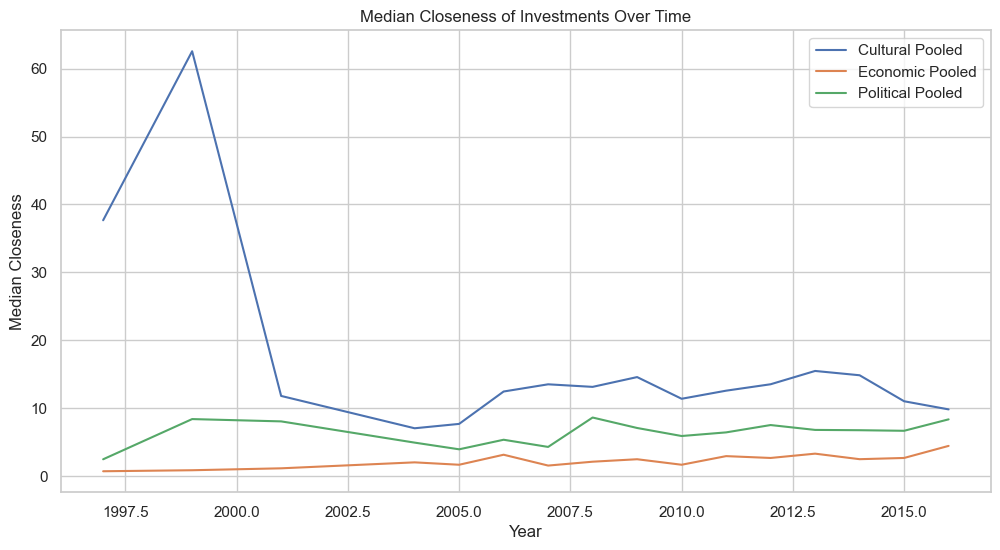

<Figure size 640x480 with 0 Axes>

In [10]:
# For each year, calculate the median for 'Cultural_pooled', 'Economic_pooled', and 'Political_pooled'
median_cultural = df_fdi_invest.groupby('year')['Cultural_pooled'].median()
median_economic = df_fdi_invest.groupby('year')['Economic_pooled'].median()
median_political = df_fdi_invest.groupby('year')['Political_pooled'].median()

# Plot the trends for each column
plt.figure(figsize=(12, 6))
sns.lineplot(x=median_cultural.index, y=median_cultural.values, label='Cultural Pooled')
sns.lineplot(x=median_economic.index, y=median_economic.values, label='Economic Pooled')
sns.lineplot(x=median_political.index, y=median_political.values, label='Political Pooled')
plt.title('Median Closeness of Investments Over Time')
plt.xlabel('Year')
plt.ylabel('Median Closeness')
plt.legend()
plt.show()

plt.savefig('plots/closeness_plot.png',dpi=300)

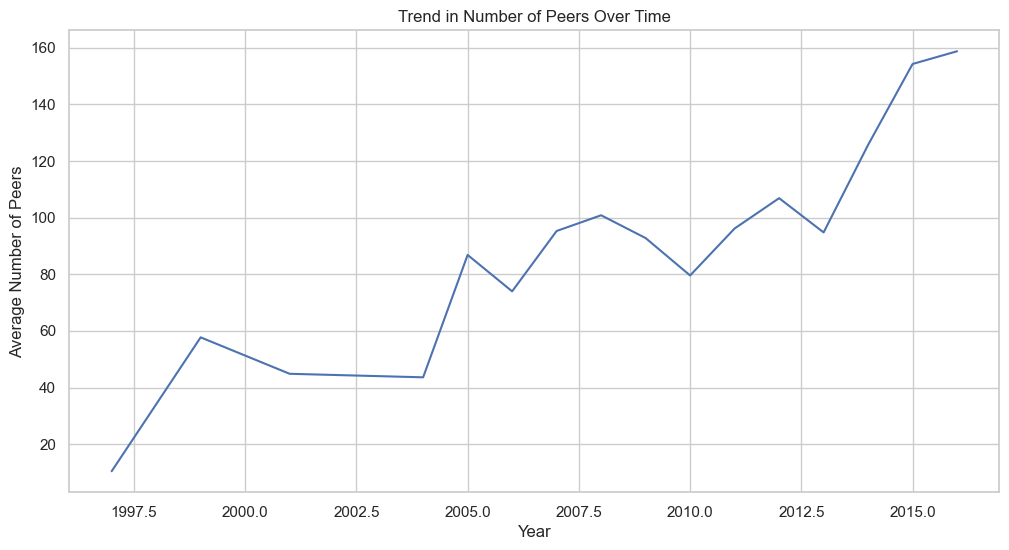

<Figure size 640x480 with 0 Axes>

In [11]:
# Plot the trend for the number of 'peers' for each year
peers_trend = df_fdi_invest.groupby('year')['peers'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=peers_trend.index, y=peers_trend.values)
plt.title('Trend in Number of Peers Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Peers')
plt.show()

plt.savefig('plots/peers_plot.png',dpi=300)

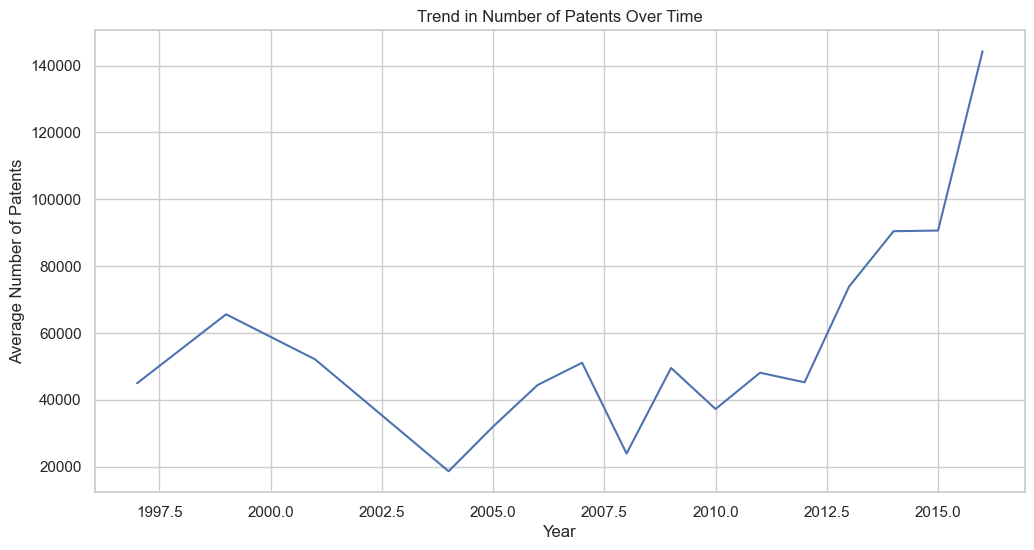

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the trend for the number of 'patents' for each year
patents_trend = df_fdi_invest.groupby('year')['patents'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=patents_trend.index, y=patents_trend.values)
plt.title('Trend in Number of Patents Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Patents')
plt.show()

plt.savefig('plots/patents_plot.png',dpi=300)

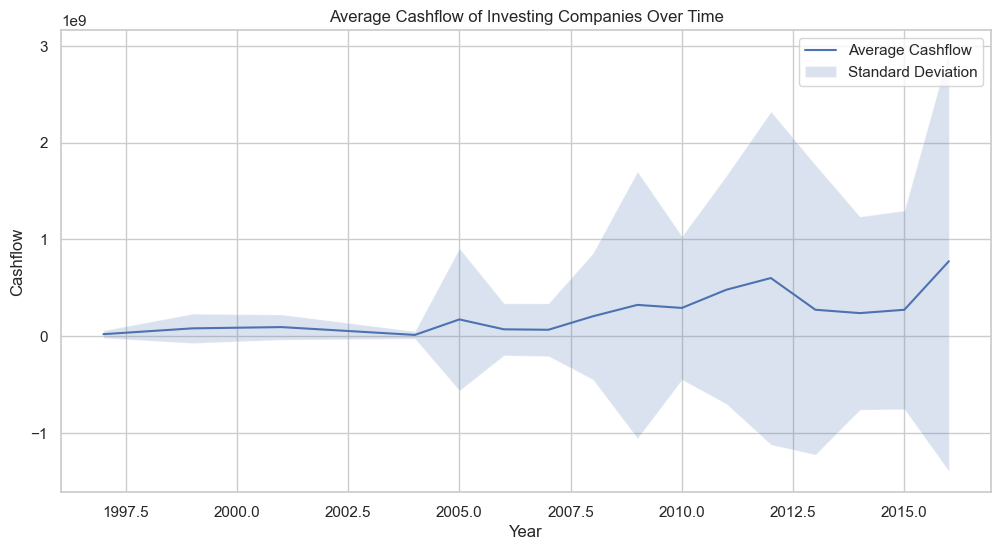

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the trend for 'cashflow' with average and standard deviation
cashflow_trend = df_fdi_invest.groupby('year')['cashflow'].agg(['mean', 'std'])

plt.figure(figsize=(12, 6))
sns.lineplot(x=cashflow_trend.index, y=cashflow_trend['mean'], label='Average Cashflow')
plt.fill_between(cashflow_trend.index, cashflow_trend['mean'] - cashflow_trend['std'], cashflow_trend['mean'] + cashflow_trend['std'], alpha=0.2, label='Standard Deviation')
plt.title('Average Cashflow of Investing Companies Over Time')
plt.xlabel('Year')
plt.ylabel('Cashflow')
plt.legend()
plt.show()

plt.savefig('plots/cashflow_trend_plot.png',dpi=300)

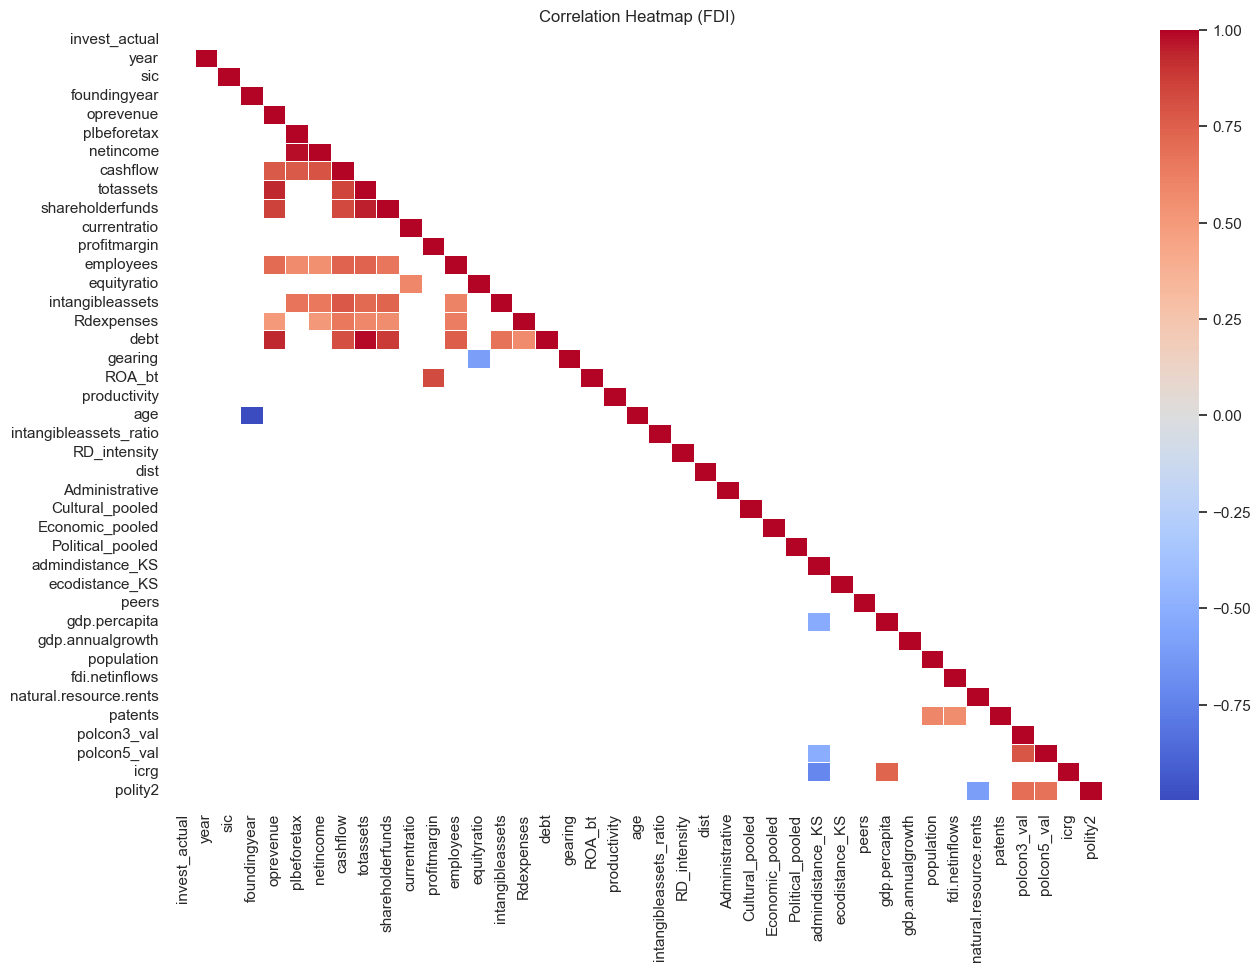

In [14]:
corr_matrix = df_fdi.corr(numeric_only=True)
threshold = 0.5

# Create a mask to hide the upper triangle (redundant information)
mask = np.triu(np.ones(corr_matrix.shape), k=1)

# Create a heatmap using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)], 
            annot=False, cmap='coolwarm', linewidths=.5, mask=mask)
plt.title('Correlation Heatmap (FDI)')
plt.show()